<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Appliance-Energy-Prediction/blob/main/Team_Mind_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**

## Problem Statement

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

## Data Description

* **date** - time year-month-day hour:minute:second
* **Appliances** - energy use in Wh (Dependent variable)
* **lights** - energy use of light fixtures in the house in Wh (Drop this column)
* **T1** - Temperature in **kitchen** area, in Celsius
* **RH1** - Humidity in **kitchen** area, in % 
* **T2** - Temperature in **living room** area, in Celsius 
* **RH2** - Humidity in **living room** area, in %
* **T3** - Temperature in **laundry** room area
* **RH3** - Humidity in **laundry** room area, in % 
* **T4** - Temperature in **office room**, in Celsius 
* **RH4** - Humidity in **office room**, in %
* **T5** - Temperature in **bathroom**, in Celsius
* **RH5** - Humidity in **bathroom**, in % 
* **T6** - Temperature **outside the building** (north side), in Celsius
* **RH6** - Humidity **outside the building** (north side), in %
* **T7** - Temperature in **ironing room**, in Celsius
* **RH7** - Humidity in **ironing room**, in % 
* **T8** - Temperature in **teenager room** 2, in Celsius 
* **RH8** - Humidity in **teenager room** 2, in %
* **T9** - Temperature in **parents room**, in Celsius
* **RH9** - Humidity in **parents room**, in % 
* **T_out** - Temperature outside (from Chievres weather station), in Celsius 
* **Pressure** - (from Chievres weather station), in mm Hg RHout 
* **Humidity** - outside (from Chievres weather station), in %
* **Wind speed** - (from Chievres weather station), in m/s
* **Visibility** - (from Chievres weather station), in km
* **Tdewpoint** - (from Chievres weather station), Â°C
* rv1 - Random variable 1, nondimensional
* rv2 - Random variable 2, nondimensional
<br>
<br>
Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.


## Import Libraries

In [ ]:
# Importing basic Libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

from math import sqrt
from datetime import datetime

# Importing libraries for modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import StackingRegressor

## Importing Data

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Appliances Energy Prediction - Nikhila N S/data_application_energy.csv')

## Basic Checks

In [ ]:
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
df.tail()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  34.118851  34.118851

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
# Check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

- Date column is only used for understanding the consumption vs date time behavior and given this is not a time series problem it was removed .

- Number of Independent variables at this stage — 26
- Number of Dependent variable at this stage — 1
-Total number of rows — 19735
- All the features have numerical values. There are no categorical or ordinal features.
--Number of missing values & null values = 0

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Divide the columns based on type

col_hum = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
col_temp = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

col_weather = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

col_randoms = ["rv1", "rv2"]

In [ ]:
# Quick look at humidity values

df[col_hum].describe()

RH_1          RH_2  ...          RH_8          RH_9
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      40.259739     40.420420  ...     42.936165     41.552401
std        3.979299      4.069813  ...      5.224361      4.151497
min       27.023333     20.463333  ...     29.600000     29.166667
25%       37.333333     37.900000  ...     39.066667     38.500000
50%       39.656667     40.500000  ...     42.375000     40.900000
75%       43.066667     43.260000  ...     46.536000     44.338095
max       63.360000     56.026667  ...     58.780000     53.326667

[8 rows x 9 columns]

* We see that the humidity inside the house is similar in various rooms of the house.
* RH_6 - humidity in the bathroom - since the bathroom is not always in use, it is reasonable to see a high variance. When the bathroom is in use, we would see high humidity and vice versa. 
* RH_5 - humidty outside the house - this is measured by the sensor. Humidity outside the house will have different values than inside the house. 

In [ ]:
# Quick look at temperature values

df[col_temp].describe()

T1            T2  ...            T8            T9
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      21.686571     20.341219  ...     22.029107     19.485828
std        1.606066      2.192974  ...      1.956162      2.014712
min       16.790000     16.100000  ...     16.306667     14.890000
25%       20.760000     18.790000  ...     20.790000     18.000000
50%       21.600000     20.000000  ...     22.100000     19.390000
75%       22.600000     21.500000  ...     23.390000     20.600000
max       26.260000     29.856667  ...     27.230000     24.500000

[8 rows x 9 columns]

* Distribution of temperature values is similar across different rooms. 
* T5 - temperature outside is also similar to the inside temperature.
* T6 - temperature inside bathroom has high variance as temperature will vary a lot depending on usage or non usage

In [ ]:
# Quick look at weather data collected from the weather station

df[col_weather].describe()

T_out   Press_mm_hg  ...    Visibility     Tdewpoint
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean       7.411665    755.522602  ...     38.330834      3.760707
std        5.317409      7.399441  ...     11.794719      4.194648
min       -5.000000    729.300000  ...      1.000000     -6.600000
25%        3.666667    750.933333  ...     29.000000      0.900000
50%        6.916667    756.100000  ...     40.000000      3.433333
75%       10.408333    760.933333  ...     40.000000      6.566667
max       26.100000    772.300000  ...     66.000000     15.500000

[8 rows x 6 columns]

In [ ]:
# Quick look at the dependant variable

df[['Appliances']].describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [ ]:
# Quick look at the lights column

df[['lights']].describe()

lights
count  19735.000000
mean       3.801875
std        7.935988
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000

## Exploratory Data Analysis

### Target Variable - Appliances

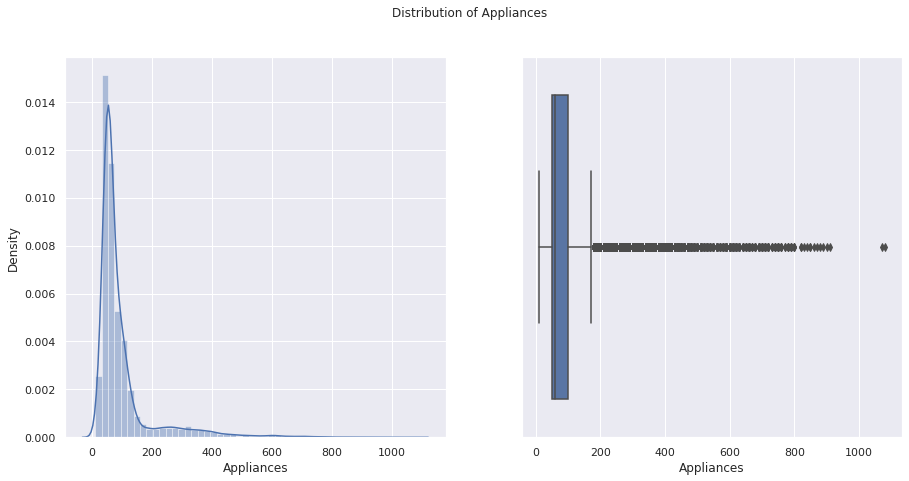

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], ax=axes[0])
sns.boxplot(data=df, x='Appliances', ax=axes[1])

plt.show()

- Distribution is highly right skewed. Also, we can see there are outliers.
- The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.

### Univariate Analysis

#### Lights

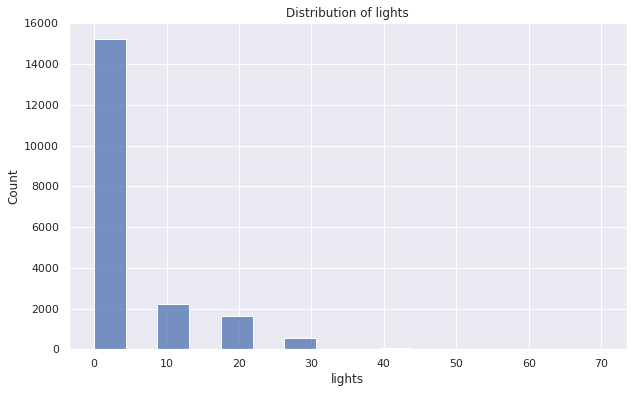

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='lights')
plt.title(f'Distribution of lights')
plt.show()

In [ ]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

Light column has 15252 entires with value = 0. It could mean there is no human presence in that room at that time; or it could be during the day where lights are not turned on; or it could be during the night when lights are turned off.

#### Temperature

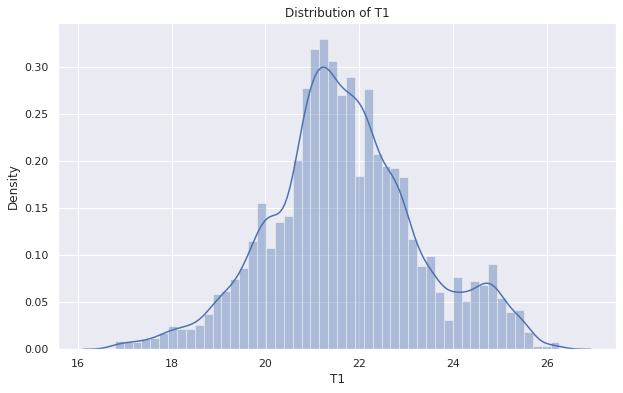

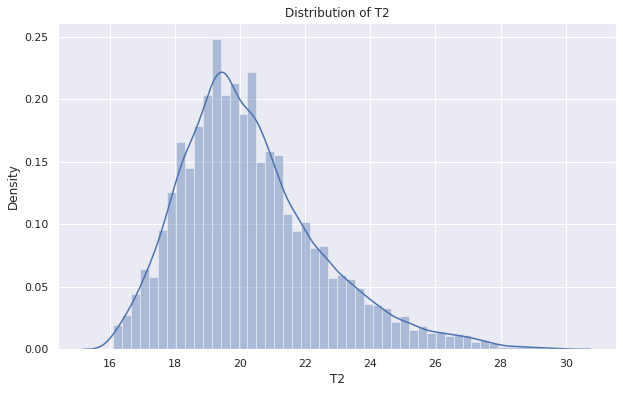

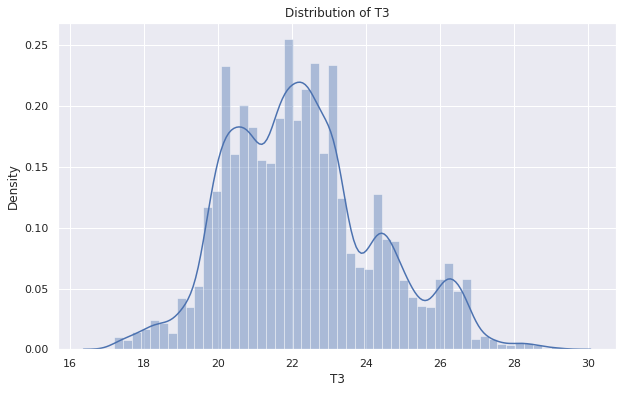

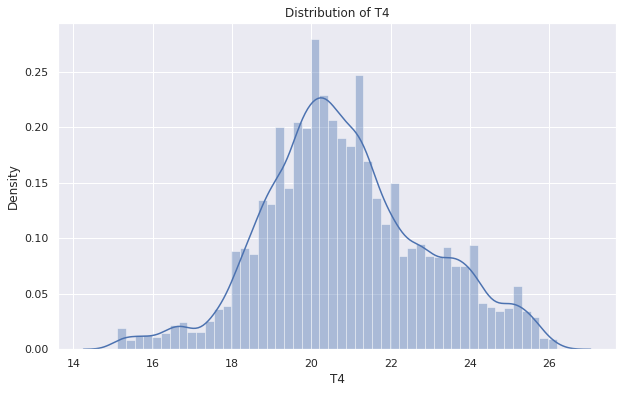

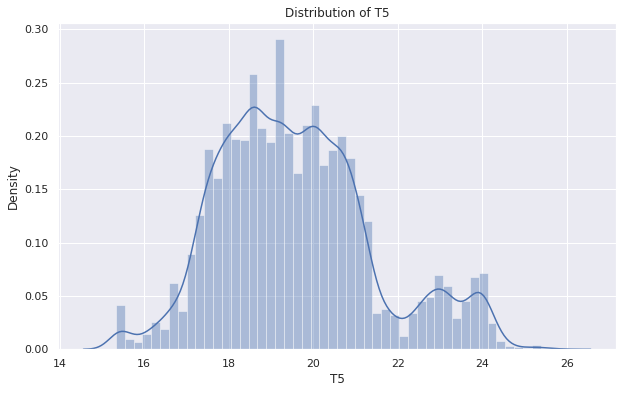

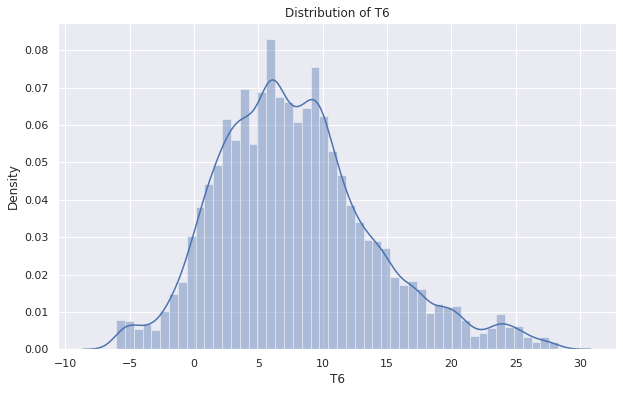

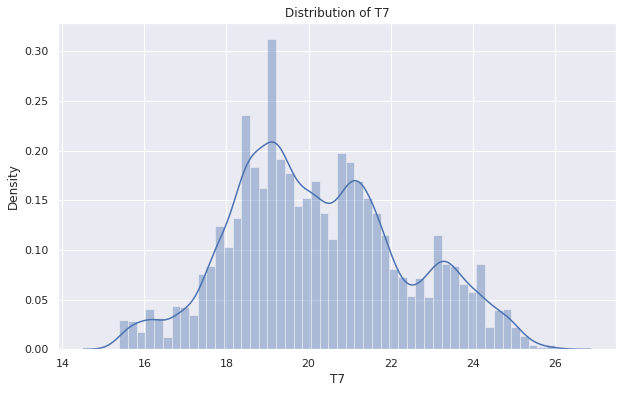

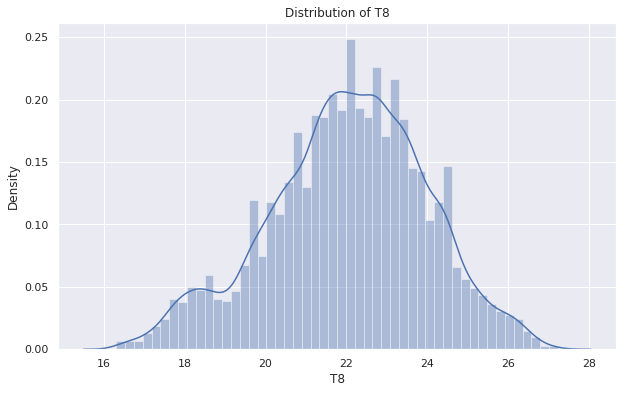

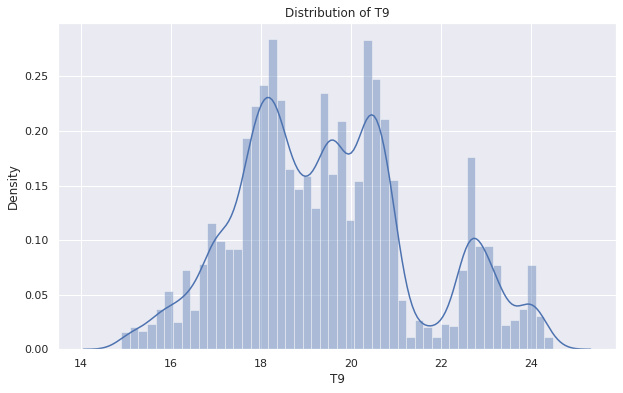

In [ ]:
for i, ii in enumerate(df[col_temp]):
  plt.figure(figsize = (10,6))
  sns.distplot(df[ii])
  plt.title(f'Distribution of {ii}')
  plt.show()

#### Humidity

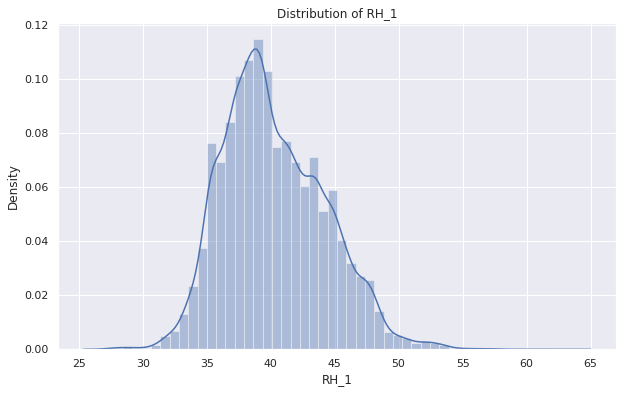

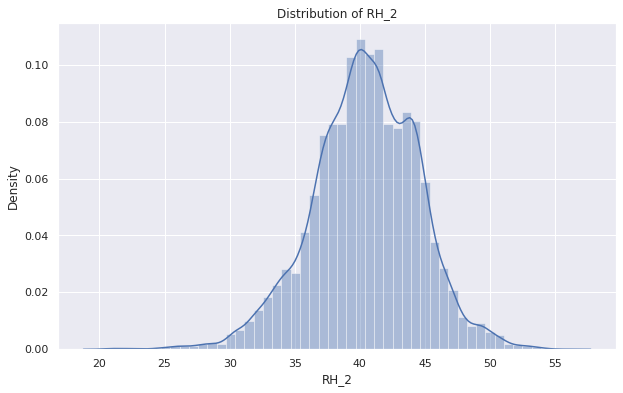

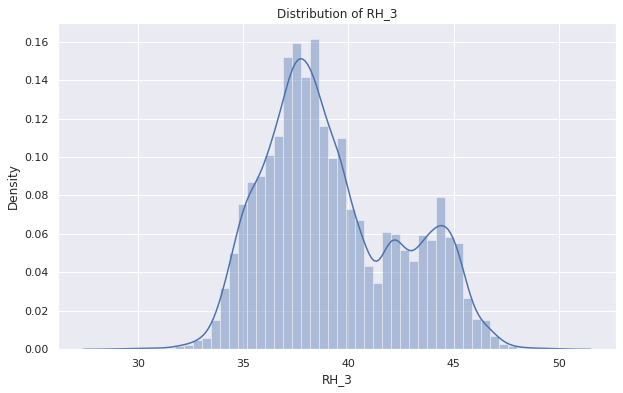

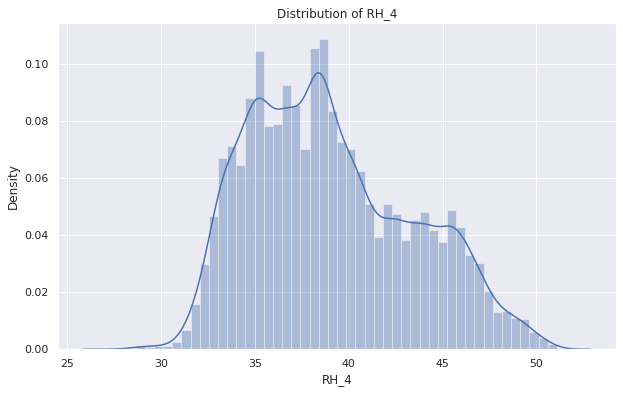

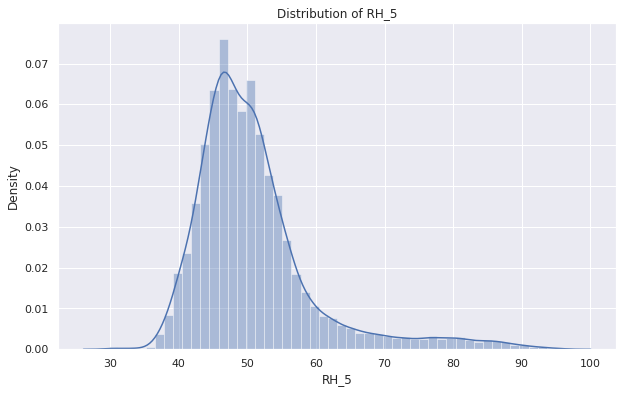

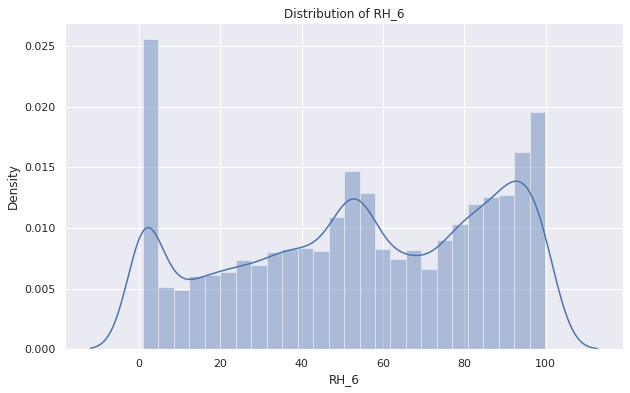

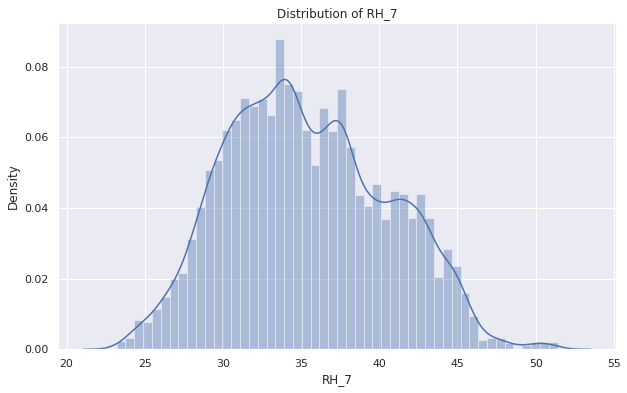

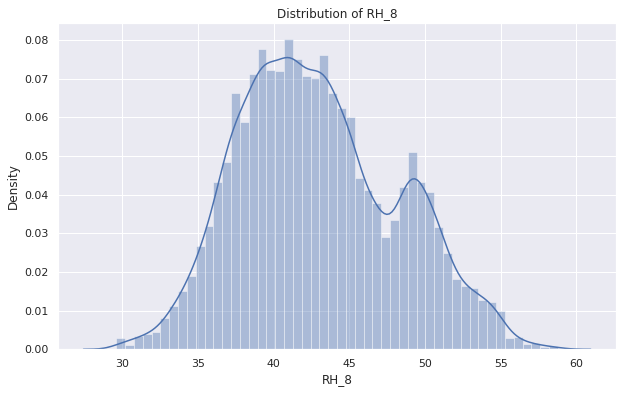

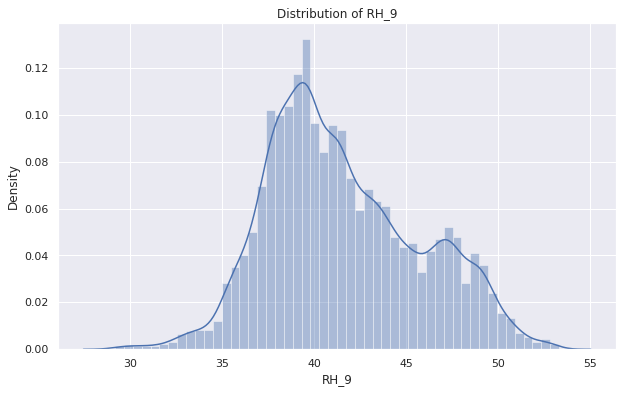

In [ ]:
for i, ii in enumerate(df[col_hum]):
  plt.figure(figsize = (10,6))
  sns.distplot(df[ii])
  plt.title(f'Distribution of {ii}')
  plt.show()

All humidity varaibles follow mostly normal distribution except for RH_6 - which is the humidity outside. 

#### Outside Weather

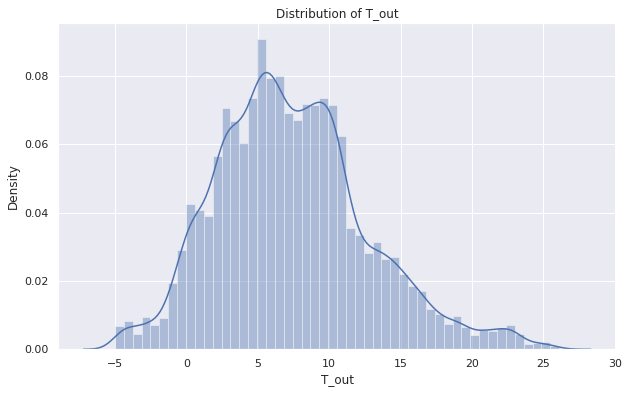

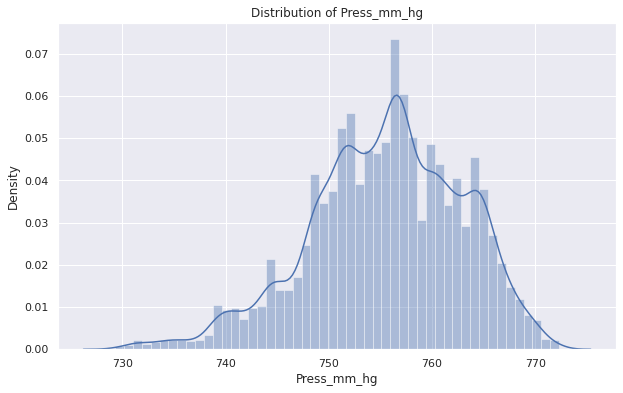

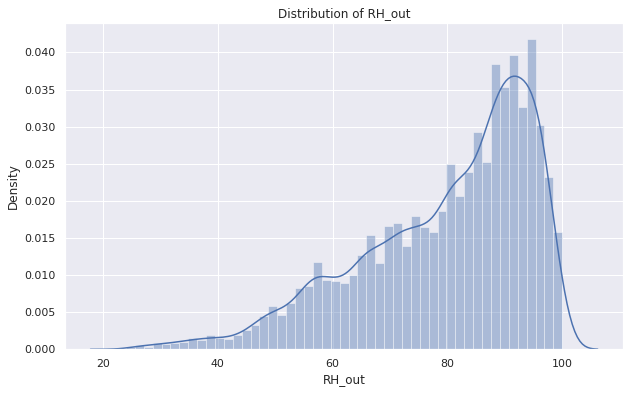

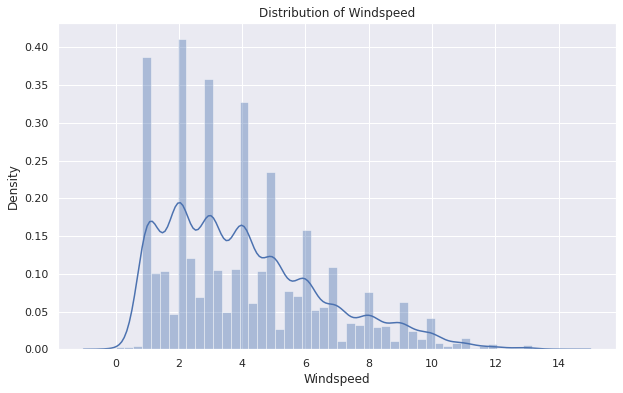

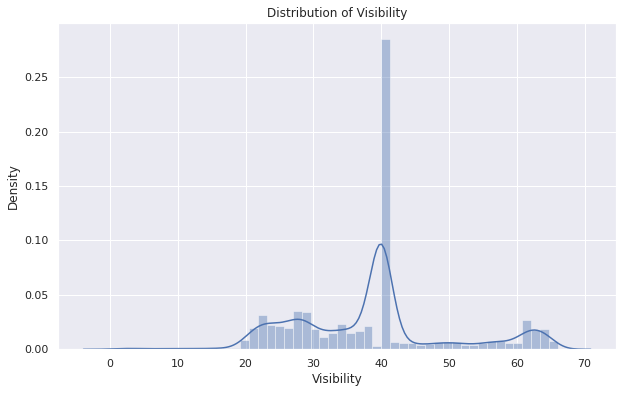

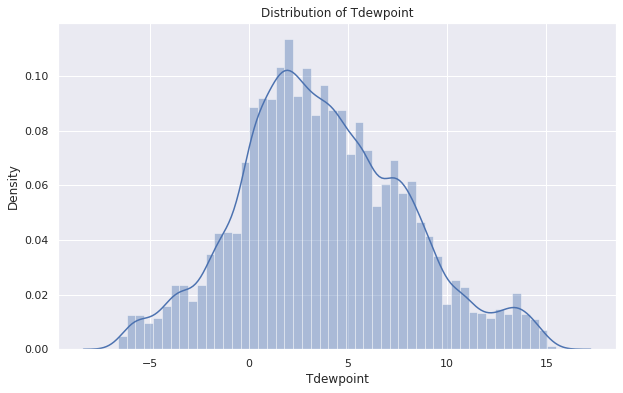

In [ ]:
for i, ii in enumerate(df[col_weather]):
  plt.figure(figsize = (10,6))
  sns.distplot(df[ii])
  plt.title(f'Distribution of {ii}')
  plt.show()

#### Random Variables

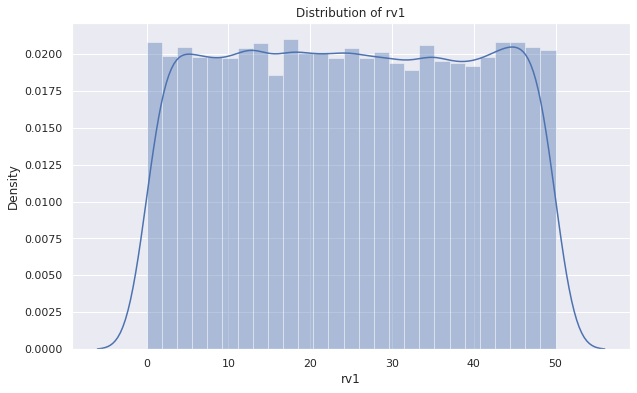

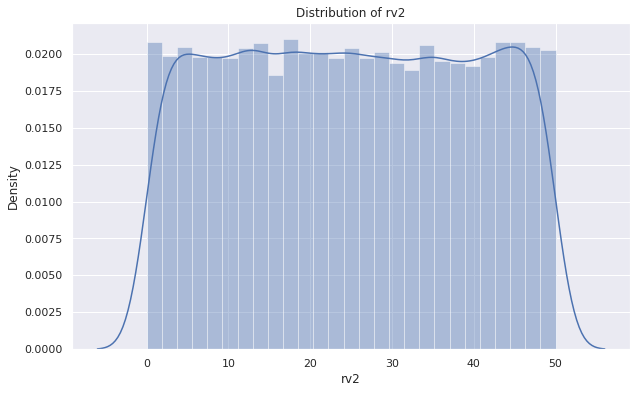

In [ ]:
for i, ii in enumerate(df[col_randoms]):
  plt.figure(figsize = (10,6))
  sns.distplot(df[ii])
  plt.title(f'Distribution of {ii}')
  plt.show()

- All humidity values except RH_6 follow a Normal distribution, i.e.all the readings from sensors inside the home are from a Normal distribution.
- Similarly, all temperature readings follow a Normal distribution except for T9.
- Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
- The random variables rv1 and rv2 have more or less the same values for all the recordings.

### Bivariate Analysis

Extracting date time features from the date column

In [ ]:
df['date_1'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['exact_date'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
df['day_name'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%A'))
df['day_num'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%w'))
df['hour']=(df['date'].str.split(' ').str[1].str.split(':').str[0]).astype(int)
df['week_status'] = np.where((df['day_name']=='Saturday') | (df['day_name']=='Sunday'), 'Weekend', 'Weekday' )

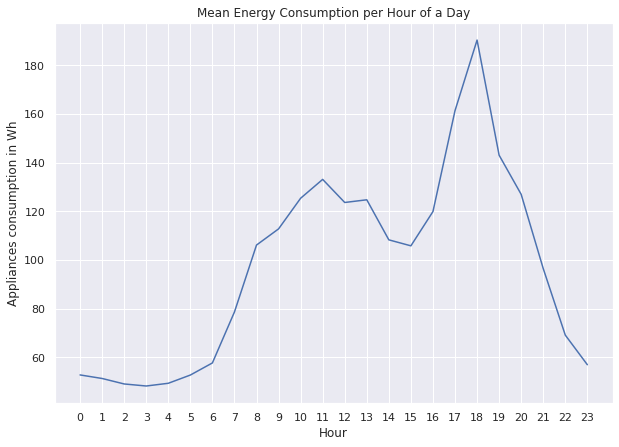

In [ ]:
# Mean Energy Consumption per hour

df.groupby('hour')['Appliances'].mean().plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks)

plt.show()

* During night time appliance usage is low.
* High during morning hours
* And it peaks during the evening.

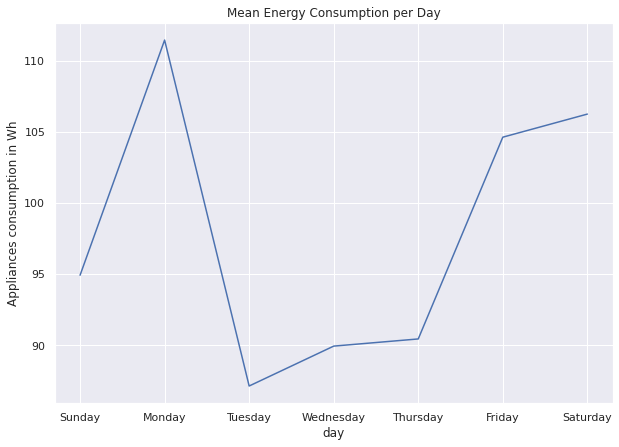

In [ ]:
# Mean Energy Consumption on different days of the week

df.groupby('day_num')['Appliances'].mean().plot(figsize=(10,7))
plt.xlabel('day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks, labels=labels)
plt.show()

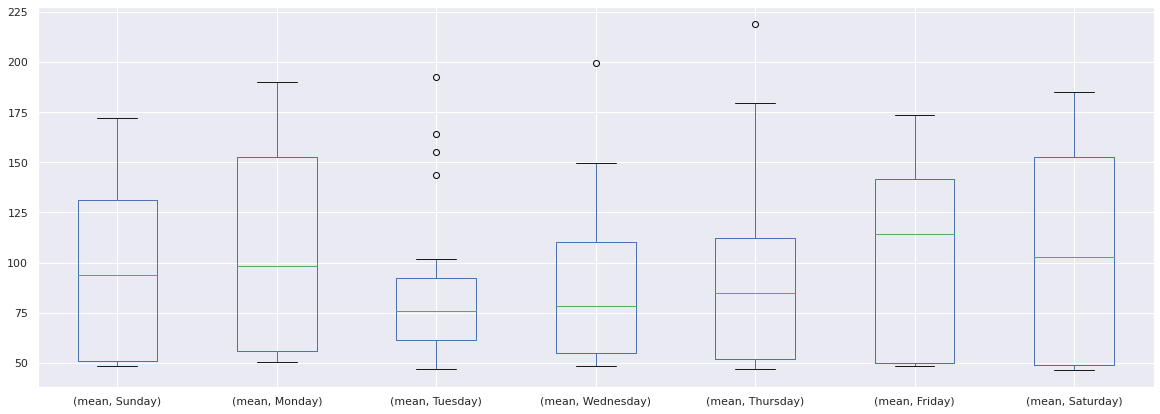

In [ ]:
# Boxplot for mean energy consumption for different days

days=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
arranged_day = pd.Categorical(df["day_name"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["hour"],
               values="Appliances",columns=day_series,
               aggfunc=[np.mean],fill_value=0)

table.plot.box(figsize=(20, 7))
plt.show()

* Energy consumption is high on weekends and low during the weekdays

Next we can create average , temp and avg hum for indoor humidity and temperature

In [ ]:
df['avg_temp']=0
for i in col_temp:
  df['avg_temp']=df['avg_temp']+df[i]
df['avg_temp']=df['avg_temp']/len(col_temp)

df['avg_hum']=0
for i in col_hum:
  df['avg_hum']=df['avg_hum']+df[i]
df['avg_hum']=df['avg_hum']/len(col_hum)

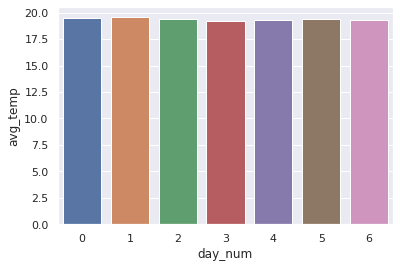

In [ ]:
weekday_temp=pd.DataFrame(df.groupby('day_num')['avg_temp'].mean()).reset_index()
sns.barplot(x=weekday_temp['day_num'],y=weekday_temp['avg_temp'])
plt.show()

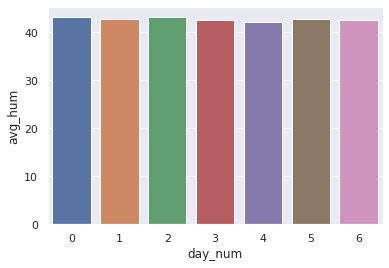

In [ ]:
weekday_hum=pd.DataFrame(df.groupby('day_num')['avg_hum'].mean()).reset_index()
sns.barplot(x=weekday_hum['day_num'],y=weekday_hum['avg_hum'])
plt.show()

* Average temperature and average humidity do not change over the week
* The idea of calculating average temperature and average humidity might not give any significant results

### Multivariate Analysis

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = px.line(df, x='date', y=df.Appliances)
fig.show()

* We can see that there peaks of high appliance usage and low appliance usage. This could probably indicate night time and day time.

* There are two large gaps in appliance usage. 
> * between 21 Jan 2016 and 30 Jan 2016
> * between 1 April 2016 and 3 April 2016


In [ ]:
# considering only 4 weeks data for the next few visulaizations for seeing better patterns. 

df_sub = df[(df['date_1']>=datetime(2016,1,11,0,0,0)) & (df['date_1']<datetime(2016,2,11,0,0,0))]
df_sub.shape

(4362, 37)

In [ ]:
# Defining a function to plot different features over time

def plot_vars(x, name, df_sub):

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{"secondary_y": True}]])

  # Add traces
  fig.add_trace(
      go.Scatter(x=df_sub['date'], y=df_sub['Appliances'], 
                name="Appliances",
                mode='lines'),
      secondary_y=False,
  )

  for i in x:
      fig.add_trace(
          go.Scatter(x=df_sub['date'], y=df_sub[i], 
                    name=i,
                    mode='lines'),
          secondary_y=True,
      )

  fig.update_layout(
      title=f'Appliance usage and {name} over four weeks',
      xaxis_title="Date")
      
  fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
  fig.update_yaxes(title_text=f"{name}", secondary_y=True)    
      
  fig.show()

In [ ]:
plot_vars(['lights'], 'Lights', df_sub)

Light usage and appliances usage almost have the same peaks.

In [ ]:
plot_vars(col_temp+['T_out'], 'Temperature', df_sub)

Excluding T6, T_out and T9, we can see that the temperature inside slightly goes up when the appliance usage is at its peak.

In [ ]:
plot_vars(col_hum+['RH_out'], 'Humidity', df_sub)

RH5 which is the humidity in bathroom peaks when bathroom is in use - due to hot water usage during bathing.

In [ ]:
plot_vars(['Windspeed', 'Visibility', 'Tdewpoint'], 'Outside Weather', df_sub)

There are no patterns we can see with respect to outside weather and appliance usage

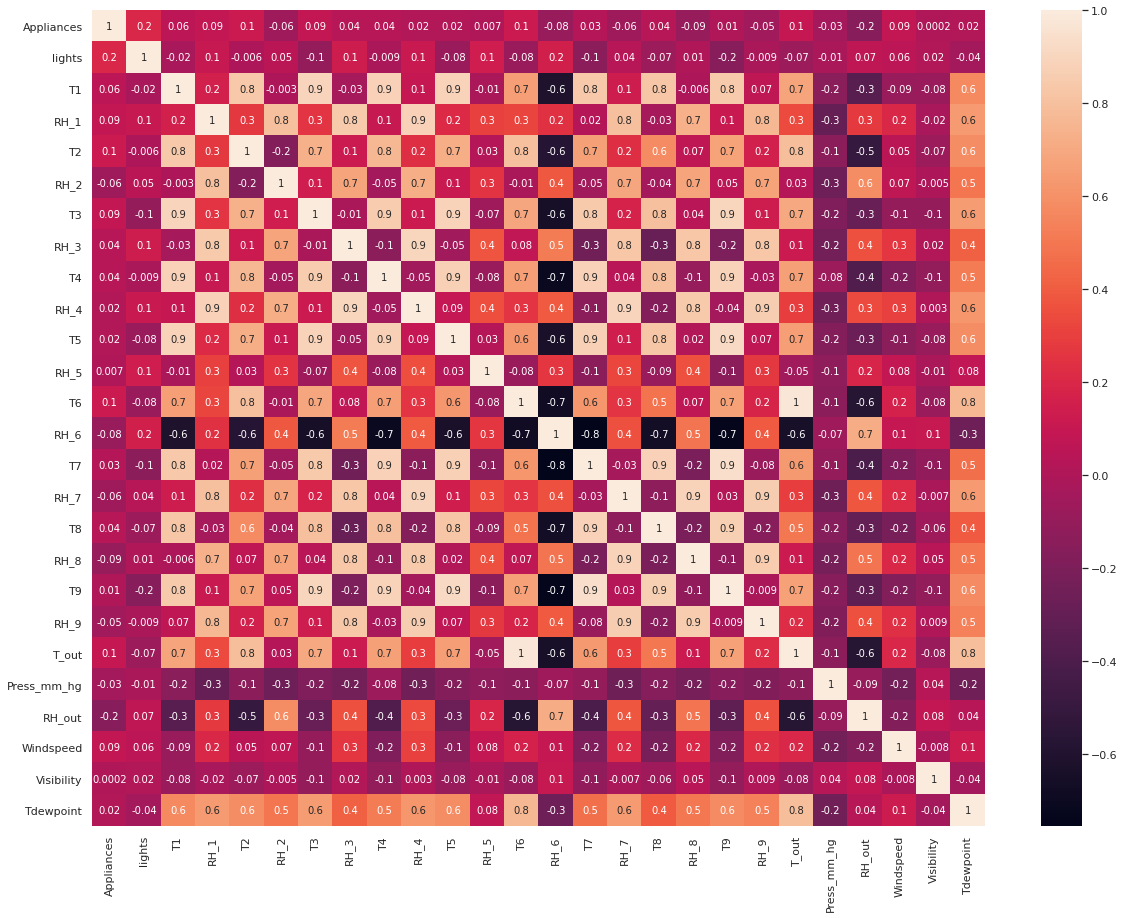

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df.iloc[:, :27].corr(), annot = True, fmt='.1g')
plt.show()

* None of the variables are highly correlated with the target variable. 
* Correlations between indoor temperature and humidity is high as expected. 
* T_out and T6 have a correlation of 1 - both are the outside temperatures. Hence we need not consider both the variables. 
* Similary RH_out and RH_6 are outside humidity. Hence they have a high positive correlation of 0.7.
* RH_6 has a negative correlation with the indoor temperatures and also outdoor temperature. This is expected as temperature and relative humidity are expected to be inversely proportional

In [ ]:
App_corr = pd.DataFrame(df.corr().iloc[:, 0]).reset_index().set_axis(['features', 'correlation'], axis=1).sort_values(['correlation'], ascending=False)
App_corr

features  correlation
0    Appliances     1.000000
28         hour     0.216792
1        lights     0.197278
4            T2     0.120073
12           T6     0.117638
20        T_out     0.099155
23    Windspeed     0.087122
3          RH_1     0.086031
6            T3     0.085060
29     avg_temp     0.078247
2            T1     0.055447
8            T4     0.040281
16           T8     0.039572
7          RH_3     0.036292
14           T7     0.025801
10           T5     0.019760
9          RH_4     0.016965
25    Tdewpoint     0.015353
18           T9     0.010010
11         RH_5     0.006955
24   Visibility     0.000230
27          rv2    -0.011145
26          rv1    -0.011145
21  Press_mm_hg    -0.034885
19         RH_9    -0.051462
15         RH_7    -0.055642
30      avg_hum    -0.060228
5          RH_2    -0.060465
13         RH_6    -0.083178
17         RH_8    -0.094039
22       RH_out    -0.152282

This way we can get the features which are most correlated with our target variable

## Preparing the data

### Removing Outliers

In [ ]:
T=df[['Appliances']]
Q1 = T.quantile(0.25)
Q3 = T.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

dfOutlier=T.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((T[column] < (Q1 - 1.5 * IQR)) |(T[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

df.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


In [ ]:
print(f'After removing Outliers {df.shape}')

After removing Outliers (17597, 37)


### Split into X and y

In [ ]:
X = df.drop(['Appliances','date', 'date_1', 'exact_date', 'day_num', 'week_status'],axis=1)
y = df['Appliances']

In [ ]:
X = pd.get_dummies(X, columns=['day_name'], drop_first=True)

In [ ]:
X.head(2)

lights     T1  ...  day_name_Tuesday  day_name_Wednesday
0      30  19.89  ...                 0                   0
1      30  19.89  ...                 0                   0

[2 rows x 36 columns]

## Modeling

### Baseline Models - without tuning

In [ ]:
# spliting the Data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# scaling the data

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
ridge = Ridge(random_state=0)
svm = SVR(kernel='rbf')
rf = RandomForestRegressor(random_state=0)
gbr = GradientBoostingRegressor(random_state=0)
xgbr = XGBRegressor(objective='reg:squarederror', random_state=0)

models = [lr, ridge, svm, rf, gbr, xgbr]

In [ ]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0

    y_train_trans=np.log10(y_train)

       
    #read model one by one
    for model in models:
        model.random_state=0
        model.fit(X_train,y_train_trans)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)      
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
              
        df.loc[i,'Train RMSE'] = sqrt(mean_squared_error( (y_train), 10**(train_pred) ) )
        df.loc[i,'Test RMSE'] = sqrt(mean_squared_error( (y_test), 10**(test_pred) ) )
        df.loc[i,'Train R2'] = metrics.r2_score( (y_train), 10**(train_pred) )
        df.loc[i,'Test R2'] = metrics.r2_score( (y_test), 10**(test_pred) )
        
        i+=1

    return(df)

In [ ]:
scores_baseline = score_model(X_train,y_train,X_test,y_test)
scores_baseline

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0           LinearRegression   22.962356  23.492512  0.347200  0.326128
1                      Ridge   22.962338  23.492431  0.347201  0.326132
2                        SVR   16.220864  18.933349  0.674242  0.562303
3      RandomForestRegressor    6.494434  16.439150  0.947781  0.670028
4  GradientBoostingRegressor   18.811366  19.982732  0.561885  0.512440
5               XGBRegressor   18.816123  19.966047  0.561663  0.513254

#### Checking Feature Importance Based on Random Forest

Text(0.5, 0, 'Relative Importance')

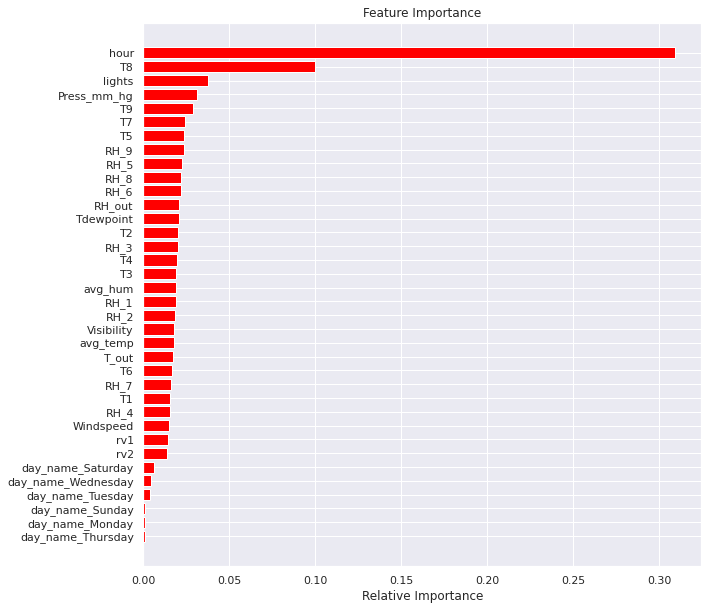

In [ ]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

### Fitting model dropping T_out, Visibility and Windspeed

* T6 and T_out have a high positive correlation of 1. So we can drop T_out.
* Also dropping Visibility and Windspeed based on low feature importance.
* We are going to keep all other features as we want to see which rooms in the house are significant.

In [ ]:
X = df.drop(['date', 'Appliances', 'rv1', 'rv2', 'date_1', 'exact_date', 'day_name', 'day_num', 'week_status',
               'T_out', 'Visibility', 'Windspeed', 'avg_temp', 'avg_hum'
               ], axis=1)

X.head()

lights     T1       RH_1    T2  ...  Press_mm_hg  RH_out  Tdewpoint  hour
0      30  19.89  47.596667  19.2  ...        733.5    92.0        5.3    17
1      30  19.89  46.693333  19.2  ...        733.6    92.0        5.2    17
2      30  19.89  46.300000  19.2  ...        733.7    92.0        5.1    17
3      40  19.89  46.066667  19.2  ...        733.8    92.0        5.0    17
4      40  19.89  46.333333  19.2  ...        733.9    92.0        4.9    17

[5 rows x 23 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
scores_baseline_2 = score_model(X_train,y_train,X_test,y_test)
scores_baseline_2

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0           LinearRegression   23.092101  23.628237  0.339802  0.318319
1                      Ridge   23.092067  23.627664  0.339804  0.318352
2                        SVR   16.889243  18.885483  0.646843  0.564513
3      RandomForestRegressor    6.482356  16.337665  0.947975  0.674089
4  GradientBoostingRegressor   18.929761  20.078029  0.556353  0.507778
5               XGBRegressor   18.916995  20.063821  0.556951  0.508475

#### Hyperparamter tuning and CV

In [ ]:
# Define function for training model

def build_model(model, param_dict, xtrain, ytrain):

  grid = RandomizedSearchCV(estimator=model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error', n_jobs=5)
  
  y_train_trans=np.log10(ytrain)

  grid.fit(xtrain, y_train_trans)
  optimal_model = grid.best_estimator_

  return optimal_model

**Random Forest**

In [ ]:
param_dict_rf = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100], 
    'random_state': [0],
    'n_jobs' : [5]
     }

rf_optimal_model = build_model(rf, param_dict_rf, X_train, y_train)     

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:  1.4min finished


**GBM**

In [ ]:
param_dict_gbm = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'random_state': [0]
    }

gbm_optimal_model = build_model(gbr, param_dict_gbm, X_train, y_train)    

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:  4.5min finished


**XGBoost**

In [ ]:
param_dict_xgb = {
    'objective':['reg:squarederror'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'random_state': [0]}

xgb_optimal_model = build_model(xgbr, param_dict_xgb, X_train, y_train)    

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:  1.6min finished


**SVM**

In [ ]:
param_dict_svm = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
              }

svm_optimal_model = build_model(svm, param_dict_svm, X_train, y_train)              

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  2.7min finished


In [ ]:
models = [svm_optimal_model, rf_optimal_model, gbm_optimal_model, xgb_optimal_model]

In [ ]:
scores_tuned = score_model(X_train,y_train,X_test,y_test)
scores_tuned

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0                        SVR   15.139850  18.374532  0.716214  0.587759
1      RandomForestRegressor   20.156087  21.014896  0.497009  0.460771
2  GradientBoostingRegressor   13.887269  17.873772  0.761229  0.609922
3               XGBRegressor   14.639507  18.042222  0.734661  0.602535

Text(0.5, 0, 'Relative Importance')

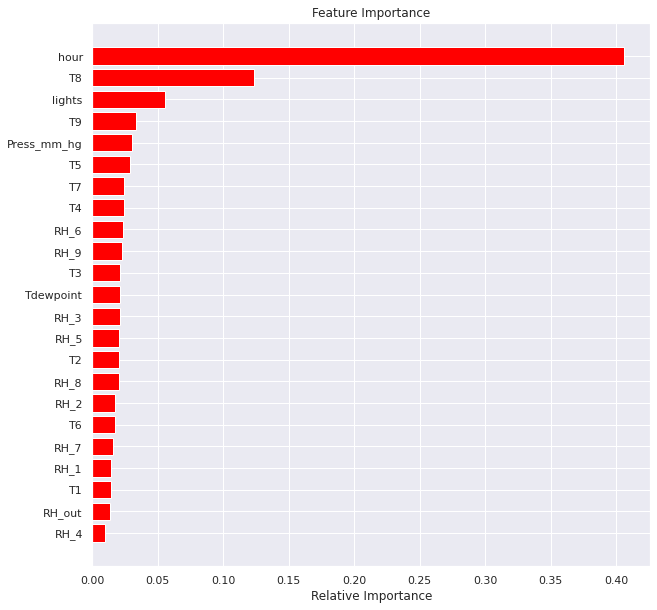

In [ ]:
features = X.columns
importances = gbm_optimal_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

**Weighted Average Ensemble**

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
def get_models():
  models = list()
  models.append(('SVM', svm))
  models.append(('Random Forest Regressor', rf))
  models.append(('Gradient Boosting Regressor', gbr))
  models.append(('XGBoost', xgbr))
  return models

In [ ]:
est = get_models()

In [ ]:
test_rmse = np.array(scores_baseline.iloc[2:, :]['Test RMSE'])
print(test_rmse)
ranking = 1 + np.argsort(np.argsort(test_rmse))
print(ranking)

[18.93334898 16.43914982 19.98273202 19.96604682]
[2 1 4 3]


In [ ]:
# create the ensemble
ensemble = VotingRegressor(estimators=est, weights=ranking)

In [ ]:
y_train_trans=np.log10(y_train)

In [ ]:
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train_trans)

VotingRegressor(estimators=[('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_de...
                                          colsample_bynode=1,
                    

In [ ]:
models = [ensemble]
score = score_model(X_train, y_train, X_test, y_test)
scores_tuned_1 = scores_tuned.append(score).reset_index()
scores_tuned_1.drop('index', axis=1, inplace=True)

In [ ]:
scores_tuned_1

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0                        SVR   15.139850  18.374532  0.716214  0.587759
1      RandomForestRegressor   20.156087  21.014896  0.497009  0.460771
2  GradientBoostingRegressor   13.887269  17.873772  0.761229  0.609922
3               XGBRegressor   14.639507  18.042222  0.734661  0.602535
4            VotingRegressor   16.920032  18.944033  0.645554  0.561809

**Stacking Ensemble**

In [ ]:
from sklearn.ensemble import StackingRegressor
stacking = StackingRegressor(estimators=est[:3], final_estimator=xgbr, cv=5)
stacking.fit(X_train, y_train_trans)

StackingRegressor(cv=5,
                  estimators=[('SVM',
                               SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impu...
                                     

In [ ]:
models = [stacking]
score = score_model(X_train, y_train, X_test, y_test)
scores_tuned_2 = scores_tuned_1.append(score).reset_index()
scores_tuned_2.drop('index', axis=1, inplace=True)
scores_tuned_2

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0                        SVR   15.139850  18.374532  0.716214  0.587759
1      RandomForestRegressor   20.156087  21.014896  0.497009  0.460771
2  GradientBoostingRegressor   13.887269  17.873772  0.761229  0.609922
3               XGBRegressor   14.639507  18.042222  0.734661  0.602535
4            VotingRegressor   16.920032  18.944033  0.645554  0.561809
5          StackingRegressor    8.920476  16.328663  0.901480  0.674448

Text(0.5, 0, 'Relative Importance')

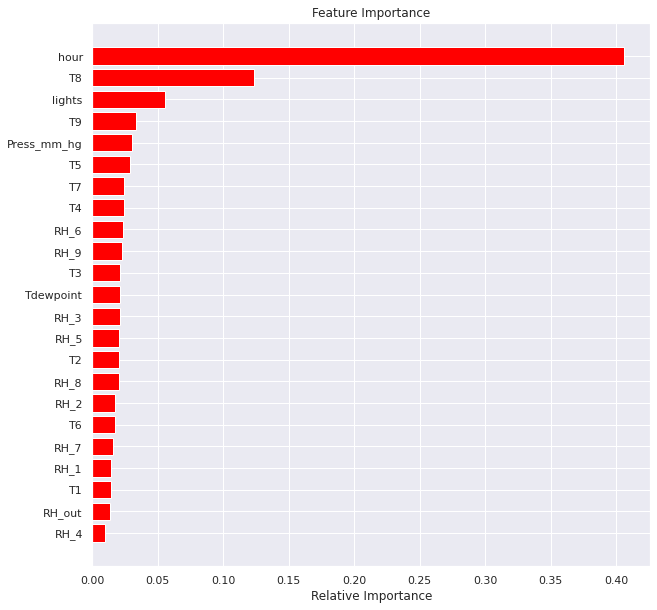

In [ ]:
features = X.columns
importances = gbm_optimal_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

### Fitting model using only select features

In [ ]:
X_fet=df.drop(['Appliances','day_name', 'day_num', 'date_1', 'exact_date', 'week_status', 'rv1','rv2','T1','Visibility','T3','T_out','T6','RH_4','avg_temp','Windspeed','avg_hum','RH_7','T2',
           'T5','date','RH_1','RH_2','RH_8','RH_5','RH_6','T4','RH_out','RH_3','Tdewpoint'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
models = [lr, ridge, svm, rf, gbr, xgbr]
scores_baseline_3 = score_model(X_train,y_train,X_test,y_test)
scores_baseline_3

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0           LinearRegression   23.092101  23.628237  0.339802  0.318319
1                      Ridge   23.092067  23.627664  0.339804  0.318352
2                        SVR   16.889243  18.885483  0.646843  0.564513
3      RandomForestRegressor    6.482356  16.337665  0.947975  0.674089
4  GradientBoostingRegressor   18.929761  20.078029  0.556353  0.507778
5               XGBRegressor   18.916995  20.063821  0.556951  0.508475

We observe here that , we dont have any improvement ove the previous model where we used all features

#### Hyperparameter tuning and CV

In [ ]:
res_tuned=[]
def tuned_model(Model,params,X):
   
  #spliting the Data into training and test

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  
  #scaling the data

  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
 
  #we have a skewness in our target variable, and we transform our data to remove it

  y_train_trans=np.log10(y_train)

  #Using Grid Search 

  model=Model()
  grid=GridSearchCV(model,params,scoring='r2',cv=5,verbose=1,n_jobs=5)

  #Fitting the Model

  grid.fit(X_train,y_train_trans)

  #Evaluation

  y_train_pred=grid.predict(X_train)
  y_pred=grid.predict(X_test)
  train_err=np.sqrt(mean_squared_error(10**y_train_pred,y_train))
  test_err=np.sqrt(mean_squared_error(10**y_pred,y_test)) 

  train_r2=r2_score(10**y_train_pred,y_train)
  test_r2=r2_score(10**y_pred,y_test)

  res_tuned.append([train_err,test_err,train_r2,test_r2])

  return y_train_pred,y_pred

In [ ]:
def eval_tuned_data(X):

  param_grid_lin = {
              "fit_intercept": [True, False]
              }
  tuned_model(LinearRegression,param_grid_lin,X)
  print('linear')

  param_grid_ridge={'alpha':[1,0.1,0.01]}
  tuned_model(Ridge,param_grid_ridge,X)
  print('ridge')

  param_grid_rf= { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }
  tuned_model(RandomForestRegressor,param_grid_rf,X)
  print('random')

  param_grid_gbm = {
    "learning_rate": [0.01, 0.1],
    "max_depth":[5,10],
    "max_features":["log2","sqrt"],
    "n_estimators":[50,100]
    }
  tuned_model(GradientBoostingRegressor,param_grid_gbm,X)
  print('gbm')

  '''param_grid_svr = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,10]}
  tuned_model(SVR,param_grid_svr)
  print('svr')'''

  param_grid_xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5,15],
              'min_child_weight': [4],
              'silent': [1],
              'n_estimators': [500]}
  tuned_model(XGBRegressor,param_grid_xg,X)
  print('xgb')

  tuned_models=['Linear Regression', 'Ridge', 'Random Forest','Gradient Boosting','XGB Regressor']
  df_res_tun=pd.DataFrame(res_tuned,columns=['Train RMSE','Test RMSE','Train R2','Test R2'])
  df_res_tun['Model']=tuned_models
  df_res_tun=df_res_tun.set_index(['Model'])

  return df_res_tun

In [ ]:
df_res_tun=eval_tuned_data(X_fet)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished


linear
Fitting 5 folds for each of 3 candidates, totalling 15 fits
ridge
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:  2.1min finished


random
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.7s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   46.3s finished


gbm
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:  2.2min finished


xgb


In [ ]:
# df_res_tun.drop(['level_0', 'index'], axis=1, inplace=True)
df_res_tun

Model  Train RMSE  Test RMSE  Train R2   Test R2
0  Linear Regression   24.645720  25.104714 -1.794884 -1.889982
1              Ridge   24.645722  25.104744 -1.795358 -1.890473
2      Random Forest    6.935094  16.845850  0.924350  0.441896
3  Gradient Boosting    9.058757  16.958174  0.862040  0.420762
4      XGB Regressor    7.352567  16.768305  0.916872  0.480380

**Modelling using Ensemble(Simple Average)**

In [ ]:
param_grid_rf= { 
      "n_estimators"      : [10,20,30],
      "max_features"      : ["auto", "sqrt", "log2"],
      "min_samples_split" : [2,4,8],
      "bootstrap": [True, False],
      }
y_tr_ran,y_pred_ran=tuned_model(RandomForestRegressor,param_grid_rf,X_fet)
print('random')

param_grid_gbm = {
  "learning_rate": [0.01, 0.1],
  "max_depth":[5,10],
  "max_features":["log2","sqrt"],
  "n_estimators":[50,100]
  }
y_tr_gbm,y_pred_gbm=tuned_model(GradientBoostingRegressor,param_grid_gbm,X_fet)
print('gbm')

param_grid_xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
            'objective':['reg:squarederror'],
            'learning_rate': [.03, 0.05], #so called `eta` value
            'max_depth': [5,15],
            'min_child_weight': [4],
            'silent': [1],
            'n_estimators': [500]}
y_tr_xgb,y_pred_xgb=tuned_model(XGBRegressor,param_grid_xg,X_fet)
print('xgb')

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:  2.1min finished


random
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.7s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   46.8s finished


gbm
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:  2.2min finished


xgb


In [ ]:
train_pred_avg=pd.DataFrame({'random':10**y_tr_ran,'gbm':10**y_tr_gbm,'xgb':10**y_tr_xgb})
pred_avg=pd.DataFrame({'random':10**y_pred_ran,'gbm':10**y_pred_gbm,'xgb':10**y_pred_xgb})
train_pred_avg['y_train_avg']=(train_pred_avg['random']+train_pred_avg['gbm']+train_pred_avg['xgb'])/3
pred_avg['y_test_avg']=(pred_avg['random']+pred_avg['gbm']+pred_avg['xgb'])/3

train_err=np.sqrt(mean_squared_error(train_pred_avg['y_train_avg'],y_train))
test_err=np.sqrt(mean_squared_error(pred_avg['y_test_avg'],y_test)) 

train_r2=r2_score(train_pred_avg['y_train_avg'],y_train)
test_r2=r2_score(pred_avg['y_test_avg'],y_test)

res_avg=[['Simple Average', train_err,test_err,train_r2,test_r2]]

In [ ]:
sa = pd.DataFrame(res_avg,columns=['Model', 'Train RMSE','Test RMSE','Train R2','Test R2'])

In [ ]:
scores_select_features = df_res_tun.append(sa, ignore_index=True)
scores_select_features

Model  Train RMSE  Test RMSE  Train R2   Test R2
0  Linear Regression   24.645720  25.104714 -1.794884 -1.889982
1              Ridge   24.645722  25.104744 -1.795358 -1.890473
2      Random Forest    6.935094  16.845850  0.924350  0.441896
3  Gradient Boosting    9.058757  16.958174  0.862040  0.420762
4      XGB Regressor    7.352567  16.768305  0.916872  0.480380
5     Simple Average    7.443401  16.611259  0.910627  0.454566

In [ ]:
scores_tuned_2

Model_Name  Train RMSE  Test RMSE  Train R2   Test R2
0                        SVR   15.139850  18.374532  0.716214  0.587759
1      RandomForestRegressor   20.156087  21.014896  0.497009  0.460771
2  GradientBoostingRegressor   13.887269  17.873772  0.761229  0.609922
3               XGBRegressor   14.639507  18.042222  0.734661  0.602535
4            VotingRegressor   16.920032  18.944033  0.645554  0.561809
5          StackingRegressor    8.920476  16.328663  0.901480  0.674448

## Conclusion

* XGBoost performs better compared to other models. We get the least RMSE on test data = 16.85 and the highest R2 score for test data = 0.65. 
* These predictions can be used by businesses to predict the power demand and better manage their resources.
* We saw that temperatures and humidity in different rooms are highly correlated. It might be sufficient to measure the temperature and humidity from the most representative rooms
* The data consists of only one house. And we do not know the number of occupants or the kind of appliances in use. This information might give us better insights on energy consumption.
* The data is only for 4.5 months. Different consumption patterns could be found depending on the different seasons in a year.